In [1]:
import pandas as pd
from prophet import Prophet
import holidays
from datetime import datetime, timedelta
import numpy as np
import plotly.graph_objs as go
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import performance_metrics
from matplotlib import pyplot
from prophet.plot import add_changepoints_to_plot
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [2]:
df = pd.read_csv('10월/전체/출하.csv')
df.head()

,datetime,매출금액
0,2021-01-01,4588701172
1,2021-01-02,5398675582
2,2021-01-03,646981558
3,2021-01-04,4378560891
4,2021-01-05,5836305593


In [3]:
df.describe()

,매출금액
count,1.003000e+03
mean,5.674008e+09
std,2.251590e+09
min,1.597217e+08
25%,5.398383e+09
50%,6.137689e+09
75%,6.869671e+09
max,1.306191e+10


<AxesSubplot:>

/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/seoghyeonjin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/seoghyeonjin/opt/anaconda

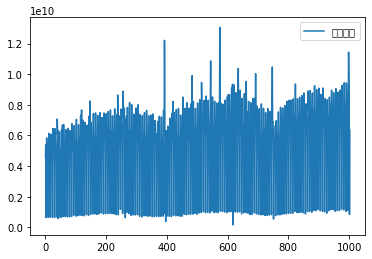

In [4]:
df.plot()

In [5]:
df = df.rename(columns={'datetime': 'ds', '매출금액': 'y'})

In [6]:
# holiday 날짜 설정/만들기
date_list=pd.date_range(start='20210101', end='20231231', freq='D')

# 한국 휴일 객체 생성 
kr_holidays = holidays.KR()
holiday_df = pd.DataFrame(columns=['ds','holiday'])
holiday_df['ds'] = sorted(date_list)
holiday_df['holiday'] = holiday_df.ds.apply(lambda x: 'holiday' if x in kr_holidays else 'non-holiday')
holiday_df.head()
holiday_df.to_csv('sales_forecast125.csv', index=False)

In [7]:
holidays = pd.read_csv('holidays.csv')

In [8]:
model = Prophet(holidays=holidays)
model.fit(df)

10:38:48 - cmdstanpy - INFO - Chain [1] start processing
10:38:48 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=365 , freq='d')
model = Prophet(holidays=holidays, 
                changepoint_prior_scale=0.05,
                weekly_seasonality=True,
                yearly_seasonality=True,
                daily_seasonality=False,
                seasonality_mode='additive' #additive(진폭 일정), multiplicative(진폭 점점 증가/감소)
)
model.fit(df)

10:38:49 - cmdstanpy - INFO - Chain [1] start processing
10:38:49 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
forecast = model.predict(future)

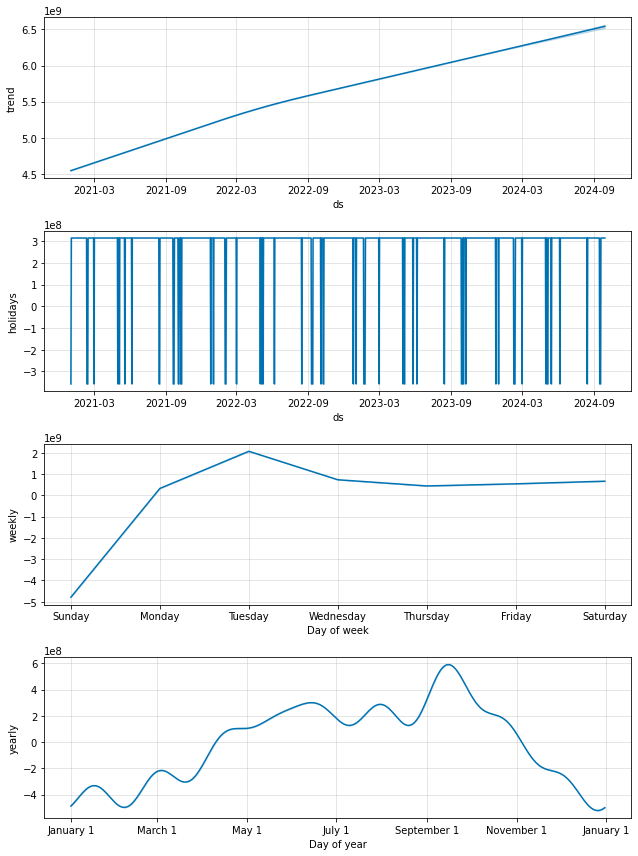

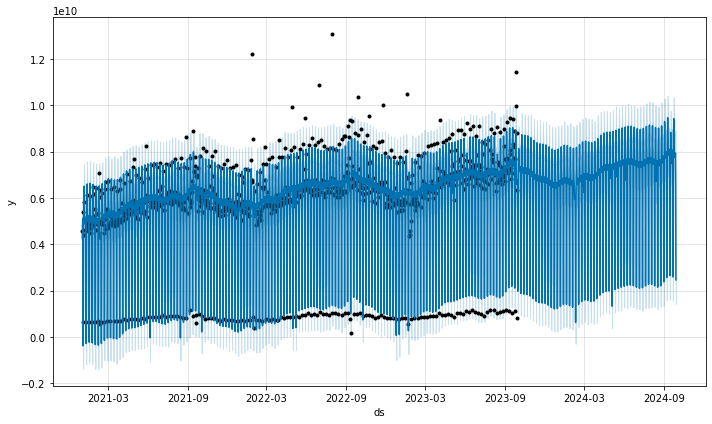

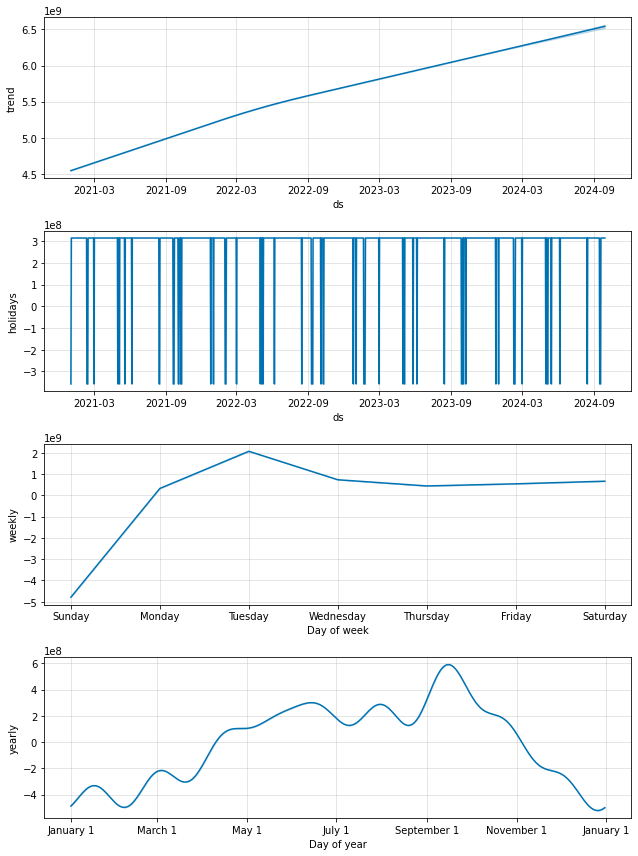

In [11]:
model.plot(forecast)
model.plot_components(forecast)

10:38:50 - cmdstanpy - INFO - Chain [1] start processing
10:38:51 - cmdstanpy - INFO - Chain [1] done processing


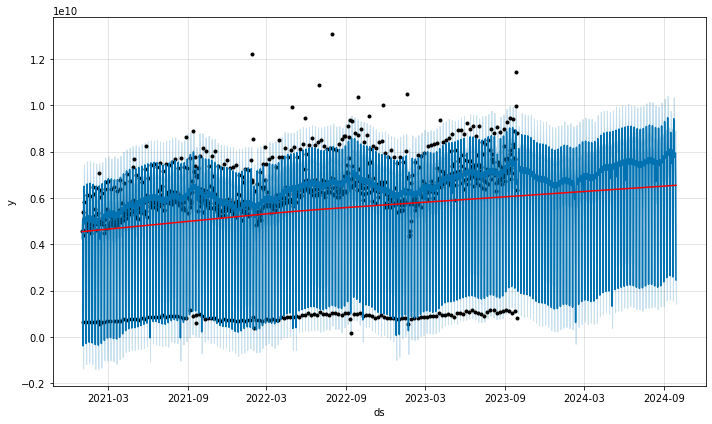

In [12]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

model = Prophet(changepoint_prior_scale=0.05)  #숫자가 높을수록 유연하게 감지 (딱 포인트 잡음), 너무 높음 오버피팅
model.fit(df)

In [13]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv('10월/전체/3.예측.csv', index=False)